<h1>Unsupervised Machine Learning</h1>

<h2>Install libs</h2>

In [96]:
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [139]:
import warnings
warnings.filterwarnings("ignore")

In [126]:
df = datasets.load_iris()

list(df)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [127]:
df.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [128]:
pd.Series(df)

data             [[5.1, 3.5, 1.4, 0.2], [4.9, 3.0, 1.4, 0.2], [...
target           [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...
frame                                                         None
target_names                       [setosa, versicolor, virginica]
DESCR            .. _iris_dataset:\n\nIris plants dataset\n----...
feature_names    [sepal length (cm), sepal width (cm), petal le...
filename                                                  iris.csv
data_module                                  sklearn.datasets.data
dtype: object

In [129]:
def convert_sklearn_df(sk):
    df = pd.DataFrame(data = sk.data, 
                     columns=sk.feature_names)
    df['target'] = pd.Series(sk.target)
    df['target_names'] = pd.Series(sk.target_names)
    
    return df

In [131]:
convert_sklearn_df

<function __main__.convert_sklearn_df(sk)>

In [132]:
df = convert_sklearn_df(df)

display(df)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,versicolor
2,4.7,3.2,1.3,0.2,0,virginica
3,4.6,3.1,1.5,0.2,0,NaN
4,5.0,3.6,1.4,0.2,0,NaN
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,NaN
146,6.3,2.5,5.0,1.9,2,NaN
147,6.5,3.0,5.2,2.0,2,NaN
148,6.2,3.4,5.4,2.3,2,NaN


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
 5   target_names       3 non-null      object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [77]:
X_ = df.iloc[:, :4].values

In [94]:
y_ = df.iloc[:, 4:].values

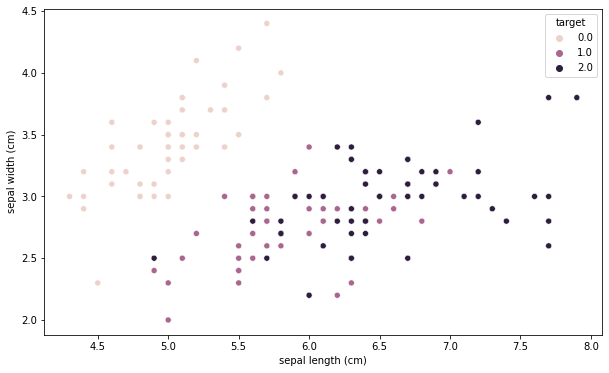

In [143]:
import seaborn as sns

plt.figure(figsize=[10,6])

df[['target']] = df[['target']].astype(float)

sns.scatterplot(data = df, 
                x = 'sepal length (cm)', 
                y = 'sepal width (cm)', 
                hue = 'target')
plt.show()

<h2>Applying the model</h2>

In [95]:
model = AgglomerativeClustering(linkage='ward',
                               n_clusters=3)

model

AgglomerativeClustering(n_clusters=3)

In [114]:
minmax = MinMaxScaler()
= minmax.fit(X_)
scaled_data = model.transform(X_)

In [119]:
model.fit(scaled_data)

MinMaxScaler()